# Investigating High Test Loss with Drug Dataset 

In [1]:
%pip install pyxet
%pip install polars
%pip install pandas
%pip install numpy
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pyxet         # make xet:// protocol available   
import pandas as pd 
import polars as pl  # faster alternative to pandas
import numpy as np
import pyarrow
import matplotlib.pyplot as plt
import os

fs = pyxet.XetFS()

In [2]:
# get to correct directory
os.chdir("..")

print(os.getcwd())

/Users/atao/GitHub/mllm-dev/mllm/notebooks


In [ ]:
# load all probabilities

# ties merge
ties_test = pl.read_csv("test_loss_exp/test_probabilities.csv")
ties_val = pl.read_csv("test_loss_exp/validation_probabilities.csv")

# dare linear merge
dare_lin_test = pl.read_csv("test_loss_exp/dare_linear_test_probabilities.csv")
dare_lin_val = pl.read_csv("test_loss_exp/dare_linear_validation_probabilities.csv")

# GPT2-XL 
gpt2_xl_test = pl.read_csv("test_loss_exp/gpt2_xl_test_probabilities.csv")
gpt2_xl_val = pl.read_csv("test_loss_exp/gpt2_xl_validation_probabilities.csv")

# base fine tuned gpt2
base_test = pl.read_csv("test_loss_exp/base_ft_test_probabilities.csv")
base_val = pl.read_csv("test_loss_exp/base_ft_validation_probabilities.csv")

# second base model
base_4_test = pl.read_csv("test_loss_exp/base_ft_4test_probabilities.csv")
base_4_val = pl.read_csv("test_loss_exp/base_ft_4validation_probabilities.csv")

In [ ]:
# create dataframes with only the probabilities
ties_test_probs = ties_test.select(pl.exclude("true_label"))
ties_val_probs = ties_val.select(pl.exclude("true_label"))

dare_lin_test_probs = dare_lin_test.select(pl.exclude("true_label"))
dare_lin_val_probs = dare_lin_val.select(pl.exclude("true_label"))

gpt2_xl_test_probs = gpt2_xl_test.select(pl.exclude("true_label"))
gpt2_xl_val_probs = gpt2_xl_val.select(pl.exclude("true_label"))


base_test_probs = base_test.select(pl.exclude("true_label"))
base_val_probs = base_val.select(pl.exclude("true_label"))


base_4_test_probs = base_4_test.select(pl.exclude("true_label"))
base_4_val_probs = base_4_val.select(pl.exclude("true_label"))

In [ ]:
# get distribution of max values
ties_test_maxes = ties_test_probs.with_columns(max = pl.max_horizontal(ties_test_probs.columns))
ties_val_maxes = ties_val_probs.with_columns(max = pl.max_horizontal(ties_val_probs.columns))


dare_lin_test_maxes = dare_lin_test_probs.with_columns(max = pl.max_horizontal(dare_lin_test_probs.columns))
dare_lin_val_maxes = dare_lin_val_probs.with_columns(max = pl.max_horizontal(dare_lin_val_probs.columns))

gpt2_xl_test_maxes = gpt2_xl_test_probs.with_columns(max = pl.max_horizontal(gpt2_xl_test_probs.columns))
gpt2_xl_val_maxes = gpt2_xl_val_probs.with_columns(max = pl.max_horizontal(gpt2_xl_val_probs.columns))


base_test_maxes = base_test_probs.with_columns(max = pl.max_horizontal(base_test_probs.columns))
base_val_maxes = base_val_probs.with_columns(max = pl.max_horizontal(base_val_probs.columns))

base_4_test_maxes = base_4_test_probs.with_columns(max = pl.max_horizontal(base_4_test_probs.columns))
base_4_val_maxes = base_4_val_probs.with_columns(max = pl.max_horizontal(base_4_val_probs.columns))

In [ ]:
base_4_test_maxes.head()

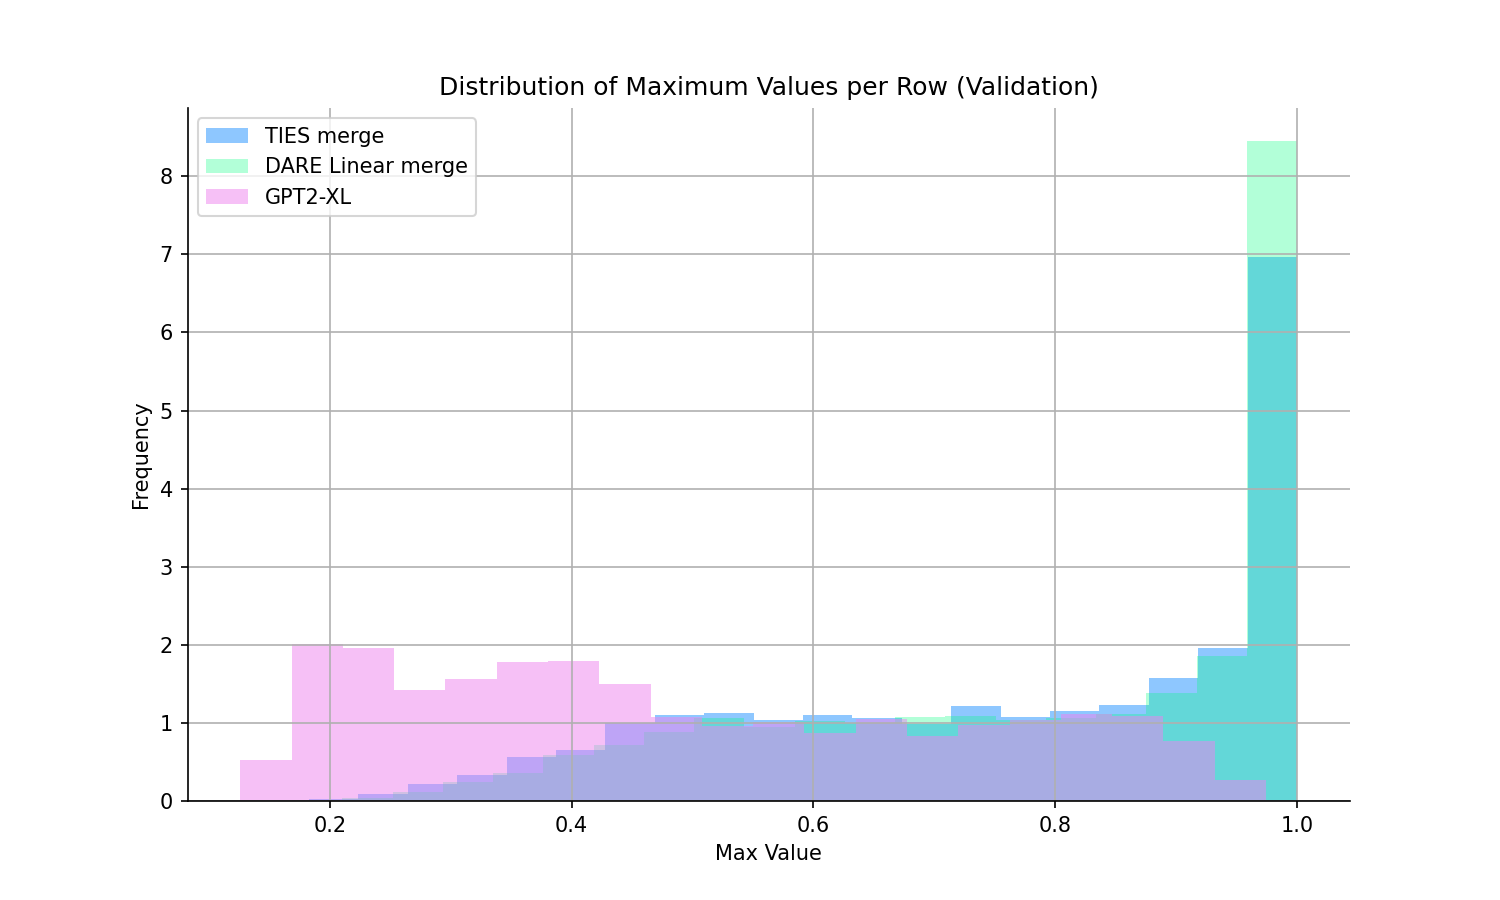

In [3]:
# Plotting the distribution
# VAL 
plt.figure(figsize = (10, 6), dpi = 100)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.hist(ties_val_maxes.select("max"), bins = 20, density = True, alpha = 0.5, label = "TIES merge", color='dodgerblue')
plt.hist(dare_lin_val_maxes.select("max"), bins = 20, density = True, alpha = 0.3, label = "DARE Linear merge", color='springgreen')
plt.hist(gpt2_xl_val_maxes.select("max"), bins = 20, density = True, alpha = 0.5, label = "GPT2-XL", color='violet')
#plt.hist(ties_val_maxes.select("max"), bins = 30, alpha = 0.75, label = "gpt2-ties-merge (validation)", color='violet')
plt.title('Distribution of Maximum Values per Row (Validation)')
plt.xlabel('Max Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.savefig("notebooks/images/val_max_distributions.png")
plt.show()

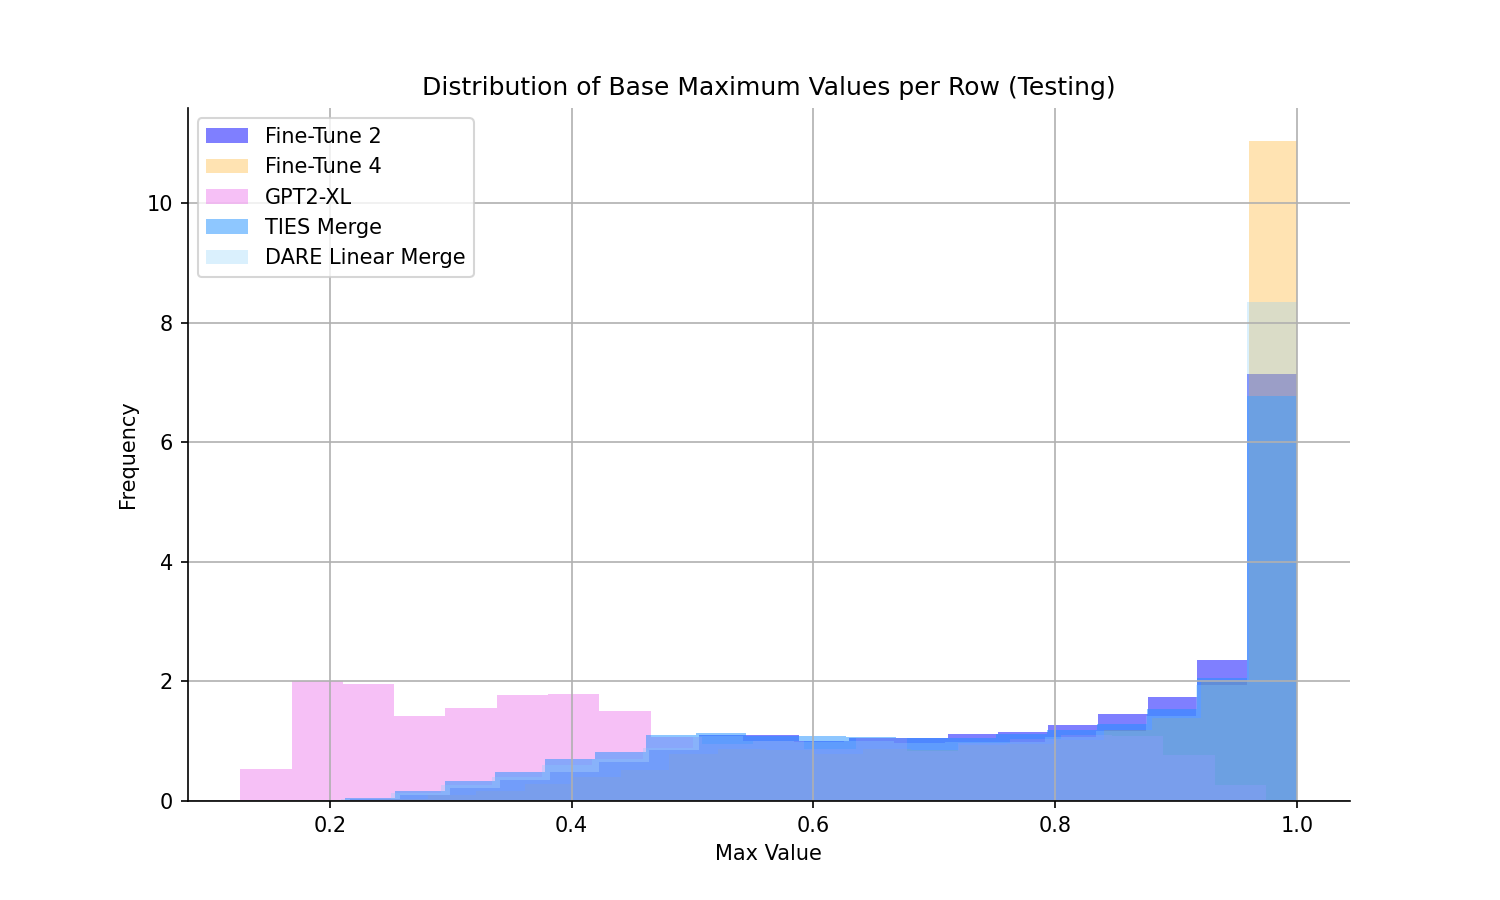

In [4]:
# Plotting the distribution
# BASE MODELS
plt.figure(figsize = (10, 6), dpi = 100)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.hist(base_test_maxes.select("max"), bins = 20, density = True, alpha = 0.5, label = "Fine-Tune 2", color='blue')
plt.hist(base_4_test_maxes.select("max"), bins = 20, density = True, alpha = 0.3, label = "Fine-Tune 4", color='orange')
plt.hist(gpt2_xl_val_maxes.select("max"), bins = 20, density = True, alpha = 0.5, label = "GPT2-XL", color='violet')
plt.hist(ties_test_maxes.select("max"), bins = 20, density = True, alpha = 0.5, label = "TIES Merge", color='dodgerblue')
plt.hist(dare_lin_test_maxes.select("max"), bins = 20, density = True, alpha = 0.3, label = "DARE Linear Merge", color='lightskyblue')
#plt.hist(ties_val_maxes.select("max"), bins = 30, alpha = 0.75, label = "gpt2-ties-merge (validation)", color='violet')
plt.title('Distribution of Base Maximum Values per Row (Testing)')
plt.xlabel('Max Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.savefig("notebooks/images/base_max_distributions.png")
plt.show()

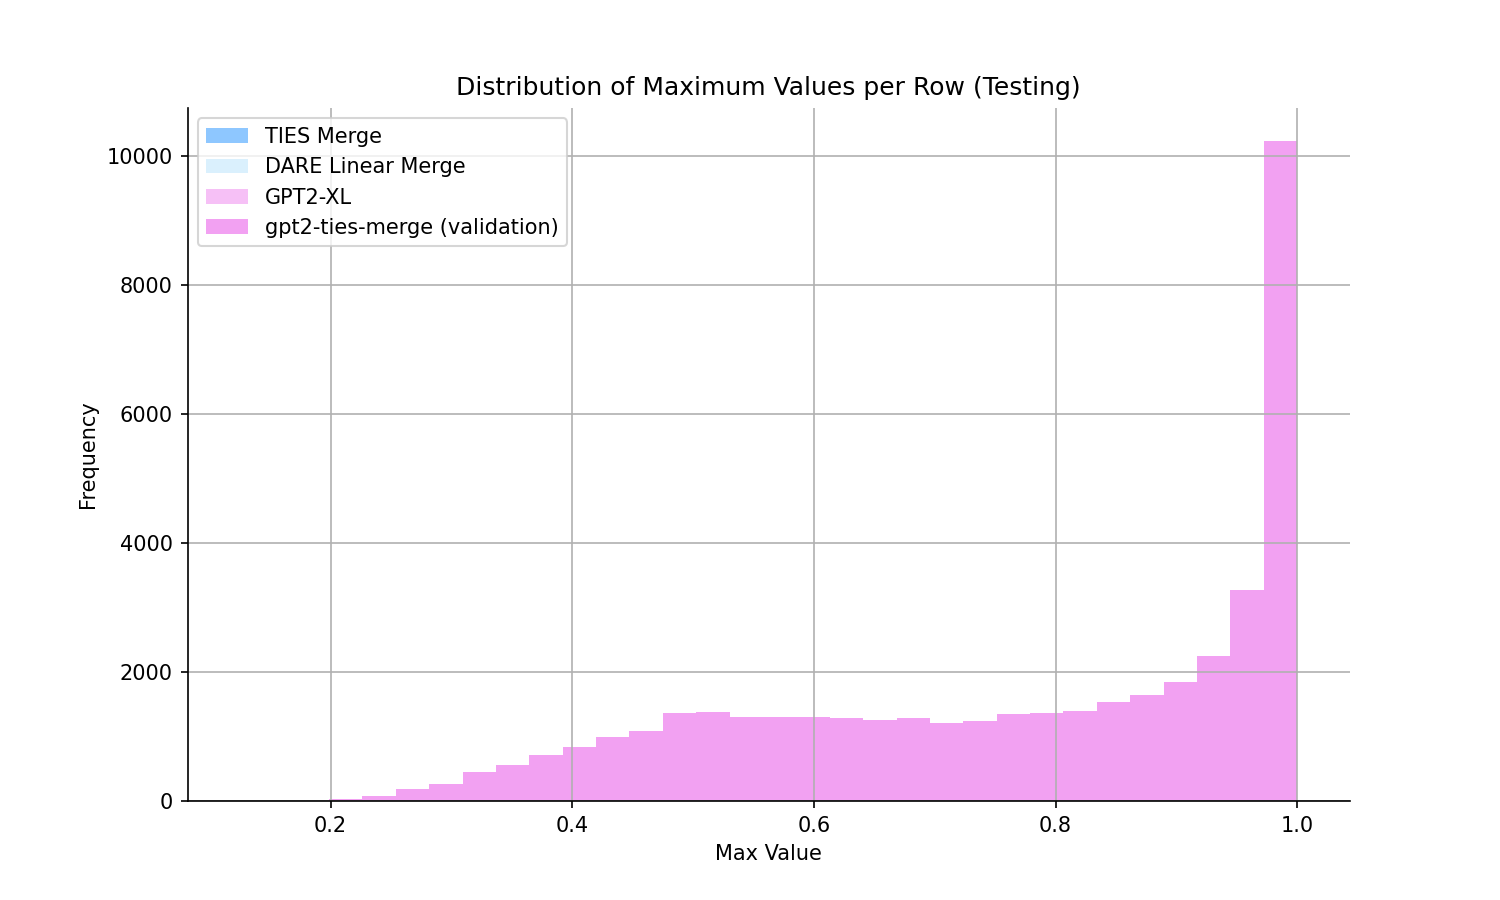

In [5]:
# Plotting the distribution
# TEST 
plt.figure(figsize = (10, 6), dpi = 100)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.hist(ties_test_maxes.select("max"), bins = 20, density = True, alpha = 0.5, label = "TIES Merge", color='dodgerblue')
plt.hist(dare_lin_test_maxes.select("max"), bins = 20, density = True, alpha = 0.3, label = "DARE Linear Merge", color='lightskyblue')
plt.hist(gpt2_xl_test_maxes.select("max"), bins = 20, density = True, alpha = 0.5, label = "GPT2-XL", color='violet')
plt.hist(ties_test_maxes.select("max"), bins = 30, alpha = 0.75, label = "gpt2-ties-merge (validation)", color='violet')
plt.title('Distribution of Maximum Values per Row (Testing)')
plt.xlabel('Max Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.savefig("notebooks/images/test_max_distributions.png")
plt.show()

In [ ]:
# counts, bins, _ = plt.hist(ties_test_maxes.select("max"), bins = 20, density = True, alpha = 0.5, label = "TIES merge", color='dodgerblue')
# counts = (ties_test_maxes.select("max") / sum(ties_test_maxes.select("max"))) * 100
# 
# weights = np.ones_like(ties_test_maxes.select("max")) / len(ties_test_maxes.select("max")) * 100
# ties_test_maxes.shape
# print(weights.shape)
# plt.hist(, bins = bins, weights = weights, alpha = 0.5)
# # plt.hist(ties_test_maxes.select("max"), bins = 20, density = True, alpha = 0.5, label = "TIES merge", color='dodgerblue')

In [6]:
true_labels = ties_test.select("true_label")
true_labels = true_labels.to_numpy()

---------------------------------------------------------------------
TypeError                           Traceback (most recent call last)
Cell In[86], line 3
      1 true_labels = ties_test.select("true_label")
      2 for i, row in enumerate(ties_test.rows()):
----> 3     print(row[true_labels[i]])
      4    # row.select(str(i)) 

TypeError: tuple indices must be integers or slices, not DataFrame


In [7]:
print(true_labels[5][0])

inlabel_ties = []
for i, row in enumerate(ties_test.rows()):
    inlabel_ties.append(row[true_labels[i][0]])
   # row.select(str(i)) 

print(inlabel_ties)

8


In [ ]:
true_labels = base_test.select("true_label").to_numpy()
inlabel_base_2 = []
for i, row in enumerate(base_test.rows()):
    inlabel_base_2.append(row[true_labels[i][0]])

In [ ]:
true_labels = dare_lin_test.select("true_label").to_numpy()
inlabel_dare_lin = []
for i, row in enumerate(dare_lin_test.rows()):
    inlabel_dare_lin.append(row[true_labels[i][0]])

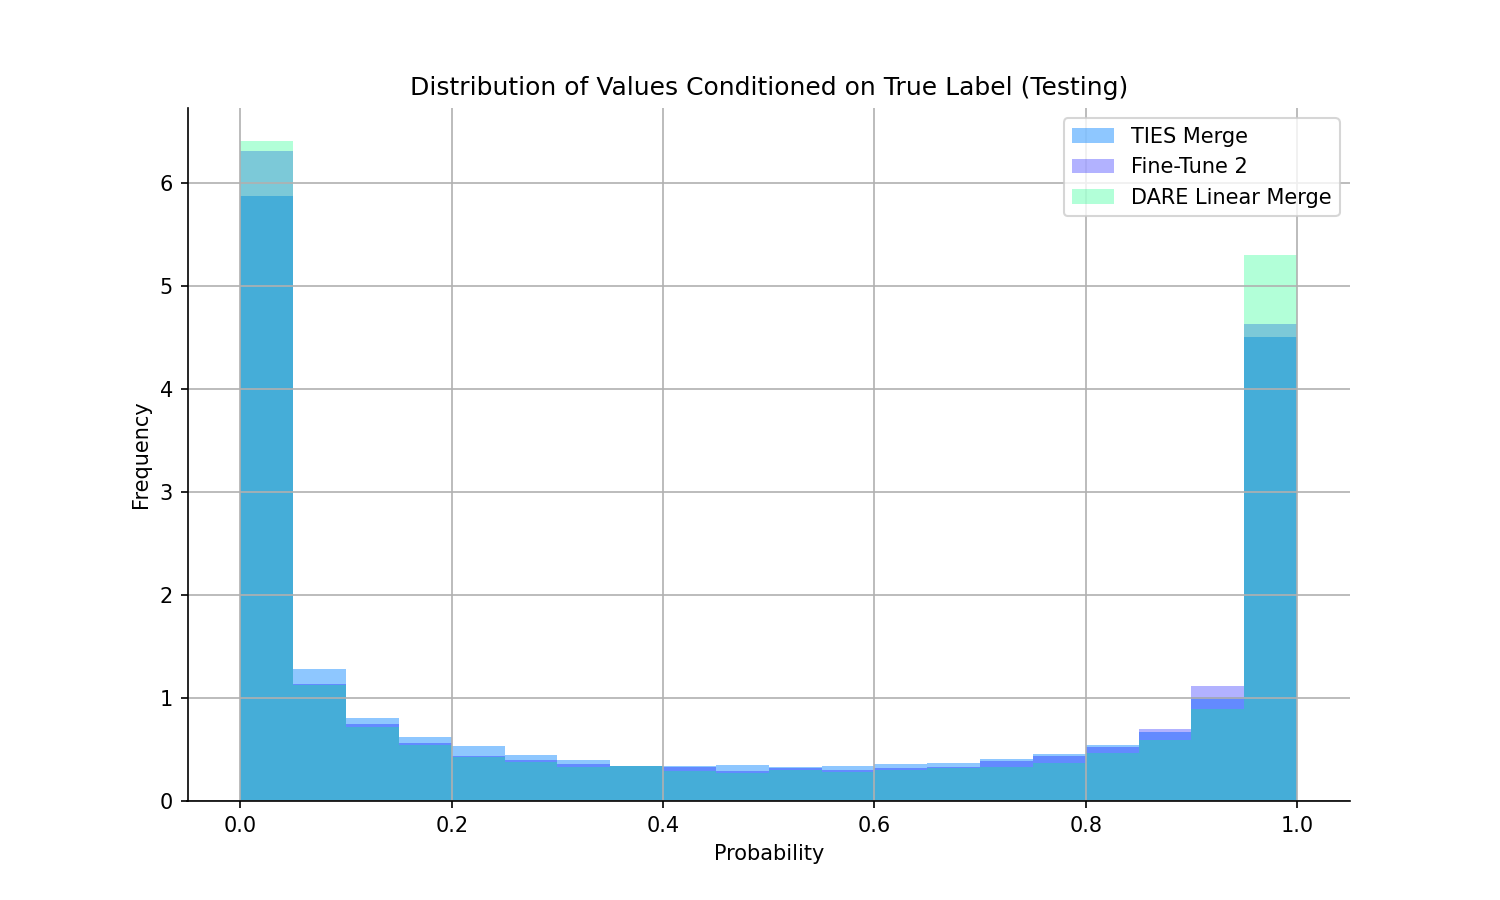

In [8]:
# FIXED 
plt.figure(figsize = (10, 6), dpi = 100)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.hist(inlabel_ties, bins = 20, density = True, alpha = 0.5, label = "TIES Merge", color='dodgerblue')
plt.hist(inlabel_base_2, bins = 20, density = True, alpha = 0.3, label = "Fine-Tune 2", color='blue')
plt.hist(inlabel_dare_lin, bins = 20, density = True, alpha = 0.3, label = "DARE Linear Merge", color='springgreen')
plt.title('Distribution of Values Conditioned on True Label (Testing)')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.savefig("notebooks/images/inlabel_ties.png")
plt.show()

In [ ]:
ties_test.columns

In [ ]:
# create dataframes with only the probabilities
ties_test_probs = get_true_probabilities(ties_test, 10)
print(ties_test_probs.columns)
ties_val_probs = ties_val.select(pl.exclude("true_label"))

dare_lin_test_probs = dare_lin_test.select(pl.exclude("true_label"))
dare_lin_val_probs = dare_lin_val.select(pl.exclude("true_label"))

gpt2_xl_test_probs = gpt2_xl_test.select(pl.exclude("true_label"))
gpt2_xl_val_probs = gpt2_xl_val.select(pl.exclude("true_label"))


base_test_probs = base_test.select(pl.exclude("true_label"))
base_val_probs = base_val.select(pl.exclude("true_label"))


base_4_test_probs = base_4_test.select(pl.exclude("true_label"))
base_4_val_probs = base_4_val.select(pl.exclude("true_label"))